<a href="https://colab.research.google.com/github/j3rsey/section_project/blob/main/ai_04_section2_project_%EA%B3%BD%EC%83%81%ED%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**분석 내용**
서울시 공공자전거 사업(이하 따릉이)데이터를 통해 많은 수익성을 보이는(이용시간 비례) 타겟층을 알아보고, 만년 적자를 줄이기 위해서는 어떻게 운영을 해야 하는지 알아본다.





In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (47.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and di

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 6.3MB/s 


##전처리, EDA

In [ ]:
import pandas as pd
public_bicycle_date_2020_06 = pd.read_csv('/content/drive/MyDrive/Project/Section2/데이터자료/공공자전거 이용정보(일별)_2020.06.csv', encoding='cp949')
public_bicycle_date_2020_01_05 = pd.read_csv('/content/drive/MyDrive/Project/Section2/데이터자료/공공자전거 이용정보(일별)_2020.01_05.csv', encoding='cp949')
public_bicycle_date_2020_07_12 = pd.read_csv('/content/drive/MyDrive/Project/Section2/데이터자료/공공자전거 이용정보(일별)_2020.07_12.csv', encoding='cp949')

In [ ]:
public_bicycle_2020 = pd.concat([public_bicycle_date_2020_01_05, public_bicycle_date_2020_06])  
public_bicycle_2020 = pd.concat([public_bicycle_2020, public_bicycle_date_2020_07_12])

In [ ]:
public_bicycle_2020.tail()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
5228703,2020-12-31,3587,3587.우성식품 앞,정기,M,AGE_004,1,0.00,0.00,0.00,12
5228704,2020-12-31,3587,3587.우성식품 앞,정기,M,AGE_005,1,0.00,0.00,0.00,12
5228705,2020-12-31,3588,3588.세종대학교(영실관),정기,\N,AGE_002,2,0.00,0.00,0.00,15
5228706,2020-12-31,3588,3588.세종대학교(영실관),정기,M,AGE_002,1,0.00,0.00,0.00,42
5228707,2020-12-31,3588,3588.세종대학교(영실관),정기,M,AGE_003,2,18.62,0.18,783.62,7


In [ ]:
public_bicycle_2020 = public_bicycle_2020.dropna()

In [ ]:
public_bicycle_2020 = public_bicycle_2020.drop(['탄소량','대여소'], axis = 1)

In [ ]:
public_bicycle_2020.isnull().sum()

대여일자       0
대여소번호      0
대여구분코드     0
성별         0
연령대코드      0
이용건수       0
운동량        0
이동거리(M)    0
이용시간(분)    0
dtype: int64

In [ ]:
delete_N = public_bicycle_2020[public_bicycle_2020['성별'] == '\\N'].index
public_bicycle_2020 = public_bicycle_2020.drop(delete_N)

In [ ]:
delete_zero_meter = public_bicycle_2020[public_bicycle_2020['이동거리(M)'] == 0].index
public_bicycle_2020 = public_bicycle_2020.drop(delete_zero_meter)

In [ ]:
delete_code = public_bicycle_2020[public_bicycle_2020['대여구분코드'] == 'BIL_021'].index
public_bicycle_2020 = public_bicycle_2020.drop(delete_code)

In [ ]:
public_bicycle_2020.reset_index(drop=True)

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분)
0,2020-01-01,102,정기,F,AGE_002,1,9.90,500.00,5
1,2020-01-01,102,정기,F,AGE_003,2,103.91,5050.00,38
2,2020-01-01,104,일일(회원),F,AGE_002,1,52.75,2220.00,13
3,2020-01-01,104,일일(회원),M,AGE_002,1,145.05,6660.00,57
4,2020-01-01,106,단체,F,AGE_004,3,110.93,4310.00,73
...,...,...,...,...,...,...,...,...,...
602979,2020-12-31,3586,정기,F,AGE_004,1,30.89,1200.00,10
602980,2020-12-31,3586,정기,M,AGE_002,4,67.42,2619.20,60
602981,2020-12-31,3587,정기,M,AGE_002,3,24.35,940.18,15
602982,2020-12-31,3587,정기,M,AGE_003,2,74.75,2550.79,66


In [ ]:
public_bicycle_2020.describe()

,대여소번호,이용건수,이동거리(M),이용시간(분)
count,602984.000000,602984.000000,6.029840e+05,602984.000000
mean,1257.407444,3.113632,1.227477e+04,91.716042
std,922.509818,3.227517,2.173801e+05,134.966673
min,3.000000,1.000000,1.000000e-01,0.000000
25%,512.000000,1.000000,1.600000e+03,22.000000
50%,1150.000000,2.000000,3.530000e+03,54.000000
75%,1943.000000,4.000000,8.420000e+03,116.000000
max,99999.000000,161.000000,2.639040e+07,11586.000000


In [ ]:
public_bicycle_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602984 entries, 15 to 5228707
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     602984 non-null  object 
 1   대여소번호    602984 non-null  int64  
 2   대여구분코드   602984 non-null  object 
 3   성별       602984 non-null  object 
 4   연령대코드    602984 non-null  object 
 5   이용건수     602984 non-null  int64  
 6   운동량      602984 non-null  object 
 7   이동거리(M)  602984 non-null  float64
 8   이용시간(분)  602984 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 46.0+ MB


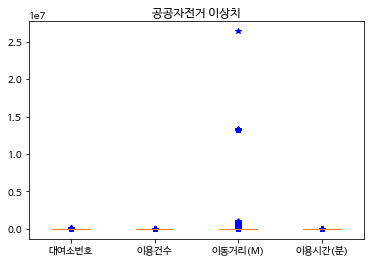

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)


fig, ax = plt.subplots()

ax.boxplot( [ public_bicycle_2020['대여소번호'], public_bicycle_2020['이용건수'], public_bicycle_2020['이동거리(M)'], public_bicycle_2020['이용시간(분)']], sym="b*")

plt.title('공공자전거 이상치')

plt.xticks([1, 2,3,4], 

           ['대여소번호', '이용건수', '이동거리(M)', '이용시간(분)'])

plt.show()


In [ ]:
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5) # Q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5) # Q1 + (iqr * 1.5)

  
  return lower_bound, upper_bound

find_outlier_by_Tukey(public_bicycle_2020['대여소번호'])

(-1634.5, 4089.5)

In [ ]:
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5) # Q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5) # Q1 + (iqr * 1.5)

  
  return lower_bound, upper_bound

find_outlier_by_Tukey(public_bicycle_2020['이용건수'])

(-3.5, 8.5)

In [ ]:
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5) # Q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5) # Q1 + (iqr * 1.5)

  
  return lower_bound, upper_bound

find_outlier_by_Tukey(public_bicycle_2020['이동거리(M)'])

(-8630.0, 18650.0)

In [ ]:
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5) # Q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5) # Q1 + (iqr * 1.5)

  
  return lower_bound, upper_bound

find_outlier_by_Tukey(public_bicycle_2020['이용시간(분)'])

(-119.0, 257.0)

In [ ]:
delete_outlier_shop_num = public_bicycle_2020[public_bicycle_2020['대여소번호']  >  4076].index
public_bicycle_2020 = public_bicycle_2020.drop(delete_outlier_shop_num)

In [ ]:
delete_outlier_use_num = public_bicycle_2020[public_bicycle_2020['이용건수']  >  9].index
public_bicycle_2020 = public_bicycle_2020.drop(delete_outlier_use_num)

In [ ]:
delete_outlier_move = public_bicycle_2020[public_bicycle_2020['이동거리(M)']  >  18649].index
public_bicycle_2020 = public_bicycle_2020.drop(delete_outlier_move)

In [ ]:
delete_outlier_time = public_bicycle_2020[public_bicycle_2020['이용시간(분)']  >  224].index
public_bicycle_2020 = public_bicycle_2020.drop(delete_outlier_time)

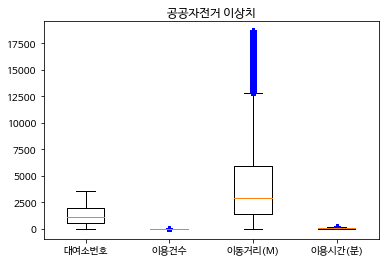

In [ ]:
fig, ax = plt.subplots()

ax.boxplot( [ public_bicycle_2020['대여소번호'], public_bicycle_2020['이용건수'], public_bicycle_2020['이동거리(M)'], public_bicycle_2020['이용시간(분)']], sym="b*")

plt.title('공공자전거 이상치')

plt.xticks([1, 2,3,4], 

           ['대여소번호', '이용건수', '이동거리(M)', '이용시간(분)'])

plt.show()

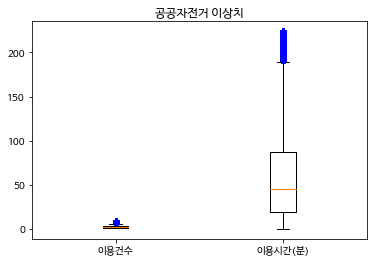

In [ ]:
fig, ax = plt.subplots()

ax.boxplot(  [public_bicycle_2020['이용건수'], public_bicycle_2020['이용시간(분)']], sym="b*")

plt.title('공공자전거 이상치')

plt.xticks([1, 2],

           ['이용건수', '이용시간(분)'])

plt.show()

In [ ]:
public_bicycle_2020 = public_bicycle_2020.reset_index()
public_bicycle_2020

,index,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분)
0,15,2020-01-01,102,정기,F,AGE_002,1,9.90,500.00,5
1,16,2020-01-01,102,정기,F,AGE_003,2,103.91,5050.00,38
2,39,2020-01-01,104,일일(회원),M,AGE_002,1,145.05,6660.00,57
3,80,2020-01-01,107,정기,F,AGE_002,1,141.61,5960.00,37
4,98,2020-01-01,109,단체,M,AGE_002,2,138.33,4990.00,29
...,...,...,...,...,...,...,...,...,...,...
447982,5228693,2020-12-31,3586,정기,F,AGE_004,1,30.89,1200.00,10
447983,5228694,2020-12-31,3586,정기,M,AGE_002,4,67.42,2619.20,60
447984,5228701,2020-12-31,3587,정기,M,AGE_002,3,24.35,940.18,15
447985,5228702,2020-12-31,3587,정기,M,AGE_003,2,74.75,2550.79,66


In [ ]:
public_bicycle_2020 = public_bicycle_2020.drop(['index'], axis = 1)

In [ ]:
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분)
0,2020-01-01,102,정기,F,AGE_002,1,9.90,500.00,5
1,2020-01-01,102,정기,F,AGE_003,2,103.91,5050.00,38
2,2020-01-01,104,일일(회원),M,AGE_002,1,145.05,6660.00,57
3,2020-01-01,107,정기,F,AGE_002,1,141.61,5960.00,37
4,2020-01-01,109,단체,M,AGE_002,2,138.33,4990.00,29
...,...,...,...,...,...,...,...,...,...
447982,2020-12-31,3586,정기,F,AGE_004,1,30.89,1200.00,10
447983,2020-12-31,3586,정기,M,AGE_002,4,67.42,2619.20,60
447984,2020-12-31,3587,정기,M,AGE_002,3,24.35,940.18,15
447985,2020-12-31,3587,정기,M,AGE_003,2,74.75,2550.79,66


In [ ]:
public_bicycle_2020['대여구분코드'].value_counts()
#정기: 1 단체 : 2 일회원 3 일비회원4

정기         337055
일일(회원)     106137
단체           4075
일일(비회원)       720
Name: 대여구분코드, dtype: int64

In [ ]:
public_bicycle_2020['연령대코드'].value_counts()

AGE_002    152278
AGE_003    113026
AGE_004     81328
AGE_005     51064
AGE_001     27975
AGE_006     17024
AGE_007      4249
AGE_008      1043
Name: 연령대코드, dtype: int64

In [ ]:
public_bicycle_2020['성별'].value_counts()

M    267255
F    180344
m       218
f       170
Name: 성별, dtype: int64

In [ ]:
public_bicycle_2020 = public_bicycle_2020.replace('정기', 1)
public_bicycle_2020 = public_bicycle_2020.replace('단체', 2)
public_bicycle_2020 = public_bicycle_2020.replace('일일(회원)', 3)
public_bicycle_2020 = public_bicycle_2020.replace('일일(비회원)', 4)

In [ ]:
public_bicycle_2020 = public_bicycle_2020.replace('m', 'M')
public_bicycle_2020 = public_bicycle_2020.replace('f', 'F')

In [ ]:
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분)
0,2020-01-01,102,1,F,AGE_002,1,9.90,500.00,5
1,2020-01-01,102,1,F,AGE_003,2,103.91,5050.00,38
2,2020-01-01,104,3,M,AGE_002,1,145.05,6660.00,57
3,2020-01-01,107,1,F,AGE_002,1,141.61,5960.00,37
4,2020-01-01,109,2,M,AGE_002,2,138.33,4990.00,29
...,...,...,...,...,...,...,...,...,...
447982,2020-12-31,3586,1,F,AGE_004,1,30.89,1200.00,10
447983,2020-12-31,3586,1,M,AGE_002,4,67.42,2619.20,60
447984,2020-12-31,3587,1,M,AGE_002,3,24.35,940.18,15
447985,2020-12-31,3587,1,M,AGE_003,2,74.75,2550.79,66


In [ ]:
public_bicycle_2020['연령_성별'] = public_bicycle_2020[['연령대코드', '성별']].apply(lambda x: '_'.join(x), axis=1)

In [ ]:
public_bicycle_2020 = public_bicycle_2020.replace('AGE_001', 10)
public_bicycle_2020 = public_bicycle_2020.replace('AGE_002', 20)
public_bicycle_2020 = public_bicycle_2020.replace('AGE_003', 30)
public_bicycle_2020 = public_bicycle_2020.replace('AGE_004', 40)
public_bicycle_2020 = public_bicycle_2020.replace('AGE_005', 50)
public_bicycle_2020 = public_bicycle_2020.replace('AGE_006', 60)
public_bicycle_2020 = public_bicycle_2020.replace('AGE_007', 70)
public_bicycle_2020 = public_bicycle_2020.replace('AGE_008', 80)

In [ ]:
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),연령_성별
0,2020-01-01,102,1,F,20,1,9.90,500.00,5,AGE_002_F
1,2020-01-01,102,1,F,30,2,103.91,5050.00,38,AGE_003_F
2,2020-01-01,104,3,M,20,1,145.05,6660.00,57,AGE_002_M
3,2020-01-01,107,1,F,20,1,141.61,5960.00,37,AGE_002_F
4,2020-01-01,109,2,M,20,2,138.33,4990.00,29,AGE_002_M
...,...,...,...,...,...,...,...,...,...,...
447982,2020-12-31,3586,1,F,40,1,30.89,1200.00,10,AGE_004_F
447983,2020-12-31,3586,1,M,20,4,67.42,2619.20,60,AGE_002_M
447984,2020-12-31,3587,1,M,20,3,24.35,940.18,15,AGE_002_M
447985,2020-12-31,3587,1,M,30,2,74.75,2550.79,66,AGE_003_M


In [ ]:
public_bicycle_2020 = public_bicycle_2020.replace('M', 0)
public_bicycle_2020 = public_bicycle_2020.replace('F', 1)

In [ ]:
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),연령_성별
0,2020-01-01,102,1,1,20,1,9.90,500.00,5,AGE_002_F
1,2020-01-01,102,1,1,30,2,103.91,5050.00,38,AGE_003_F
2,2020-01-01,104,3,0,20,1,145.05,6660.00,57,AGE_002_M
3,2020-01-01,107,1,1,20,1,141.61,5960.00,37,AGE_002_F
4,2020-01-01,109,2,0,20,2,138.33,4990.00,29,AGE_002_M
...,...,...,...,...,...,...,...,...,...,...
447982,2020-12-31,3586,1,1,40,1,30.89,1200.00,10,AGE_004_F
447983,2020-12-31,3586,1,0,20,4,67.42,2619.20,60,AGE_002_M
447984,2020-12-31,3587,1,0,20,3,24.35,940.18,15,AGE_002_M
447985,2020-12-31,3587,1,0,30,2,74.75,2550.79,66,AGE_003_M


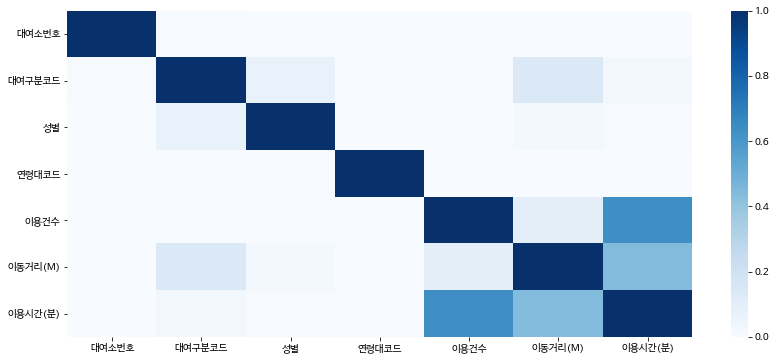

In [ ]:
import seaborn as sns
plt.figure(figsize = (14, 6))
sns.heatmap(public_bicycle_2020.corr(), vmin = 0, vmax = 1, cmap = 'Blues')

In [ ]:
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),연령_성별
0,2020-01-01,102,1,1,20,1,9.90,500.00,5,AGE_002_F
1,2020-01-01,102,1,1,30,2,103.91,5050.00,38,AGE_003_F
2,2020-01-01,104,3,0,20,1,145.05,6660.00,57,AGE_002_M
3,2020-01-01,107,1,1,20,1,141.61,5960.00,37,AGE_002_F
4,2020-01-01,109,2,0,20,2,138.33,4990.00,29,AGE_002_M
...,...,...,...,...,...,...,...,...,...,...
447982,2020-12-31,3586,1,1,40,1,30.89,1200.00,10,AGE_004_F
447983,2020-12-31,3586,1,0,20,4,67.42,2619.20,60,AGE_002_M
447984,2020-12-31,3587,1,0,20,3,24.35,940.18,15,AGE_002_M
447985,2020-12-31,3587,1,0,30,2,74.75,2550.79,66,AGE_003_M


In [ ]:
public_bicycle_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447987 entries, 0 to 447986
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     447987 non-null  object 
 1   대여소번호    447987 non-null  int64  
 2   대여구분코드   447987 non-null  int64  
 3   성별       447987 non-null  int64  
 4   연령대코드    447987 non-null  int64  
 5   이용건수     447987 non-null  int64  
 6   운동량      447987 non-null  object 
 7   이동거리(M)  447987 non-null  float64
 8   이용시간(분)  447987 non-null  int64  
 9   연령_성별    447987 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 34.2+ MB


In [ ]:
public_bicycle_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447987 entries, 0 to 447986
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     447987 non-null  object 
 1   대여소번호    447987 non-null  int64  
 2   대여구분코드   447987 non-null  int64  
 3   성별       447987 non-null  int64  
 4   연령대코드    447987 non-null  int64  
 5   이용건수     447987 non-null  int64  
 6   운동량      447987 non-null  object 
 7   이동거리(M)  447987 non-null  float64
 8   이용시간(분)  447987 non-null  int64  
 9   연령_성별    447987 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 34.2+ MB


In [ ]:
public_bicycle_2020['성별'].value_counts()

0    267473
1    180514
Name: 성별, dtype: int64

In [ ]:
public_bicycle_2020['대여일자'] = pd.to_numeric(public_bicycle_2020["대여일자"].str.replace('-', ''))
public_bicycle_2020['운동량'] = pd.to_numeric(public_bicycle_2020['운동량'])

In [ ]:
public_bicycle_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447987 entries, 0 to 447986
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     447987 non-null  int64  
 1   대여소번호    447987 non-null  int64  
 2   대여구분코드   447987 non-null  int64  
 3   성별       447987 non-null  int64  
 4   연령대코드    447987 non-null  int64  
 5   이용건수     447987 non-null  int64  
 6   운동량      447987 non-null  float64
 7   이동거리(M)  447987 non-null  float64
 8   이용시간(분)  447987 non-null  int64  
 9   연령_성별    447987 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 34.2+ MB


In [ ]:
public_bicycle_2020.corr()

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분)
대여일자,1.000000,0.063737,-0.019056,-0.017947,-0.040874,0.142695,-0.002307,-0.156860,0.105469
대여소번호,0.063737,1.000000,0.005089,-0.000372,-0.029000,-0.068912,-0.001254,-0.005571,-0.050014
대여구분코드,-0.019056,0.005089,1.000000,0.070947,-0.214777,-0.229395,-0.000245,0.142147,0.029749
성별,-0.017947,-0.000372,0.070947,1.000000,-0.088642,-0.100817,-0.001686,0.022733,0.004370
연령대코드,-0.040874,-0.029000,-0.214777,-0.088642,1.000000,-0.170298,0.002193,-0.003191,-0.086715
이용건수,0.142695,-0.068912,-0.229395,-0.100817,-0.170298,1.000000,0.001954,0.099726,0.633301
운동량,-0.002307,-0.001254,-0.000245,-0.001686,0.002193,0.001954,1.000000,0.008047,0.006120
이동거리(M),-0.156860,-0.005571,0.142147,0.022733,-0.003191,0.099726,0.008047,1.000000,0.443082
이용시간(분),0.105469,-0.050014,0.029749,0.004370,-0.086715,0.633301,0.006120,0.443082,1.000000


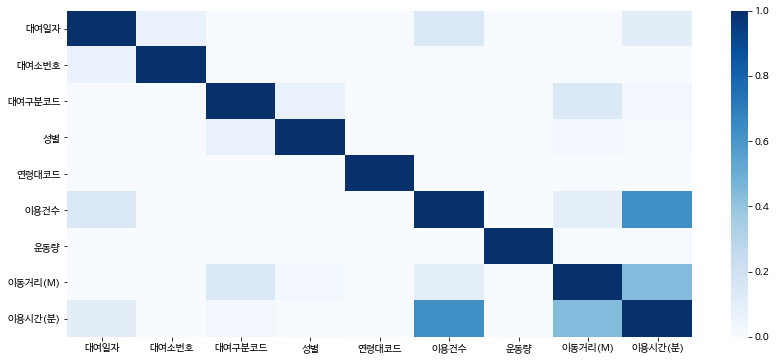

In [ ]:
import seaborn as sns
plt.figure(figsize = (14, 6))
sns.heatmap(public_bicycle_2020.corr(), vmin = 0, vmax = 1, cmap = 'Blues')

In [ ]:
public_bicycle_2020.duplicated().sum()

0

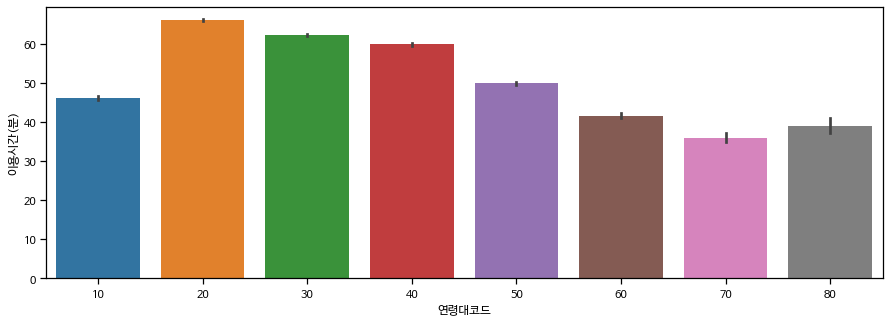

In [ ]:
plt.figure(figsize = (15, 5))
sns.set_context('notebook')
sns.barplot(x = public_bicycle_2020['연령대코드'], y = public_bicycle_2020['이용시간(분)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


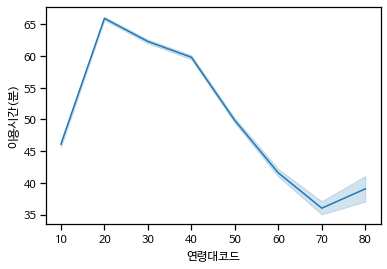

In [ ]:
sns.lineplot(public_bicycle_2020['연령대코드'], public_bicycle_2020['이용시간(분)'])

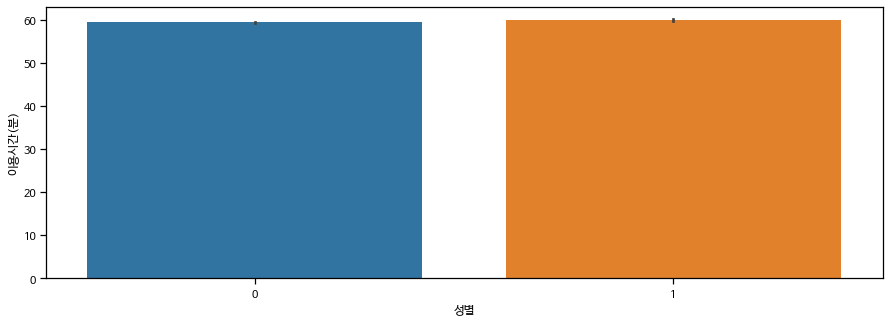

In [ ]:
plt.figure(figsize = (15, 5))
sns.set_context('notebook')
sns.barplot(x = public_bicycle_2020['성별'], y = public_bicycle_2020['이용시간(분)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


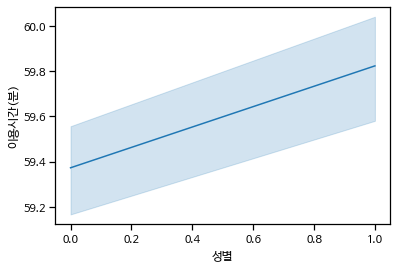

In [ ]:
sns.lineplot(public_bicycle_2020['성별'], public_bicycle_2020['이용시간(분)'])

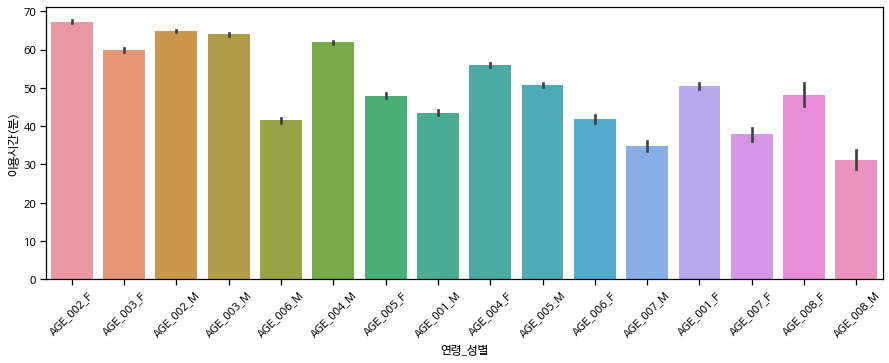

In [ ]:
plt.figure(figsize = (15, 5))
sns.set_context('notebook')
sns.barplot(x = public_bicycle_2020['연령_성별'], y = public_bicycle_2020['이용시간(분)'])
plt.xticks(rotation = 45);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


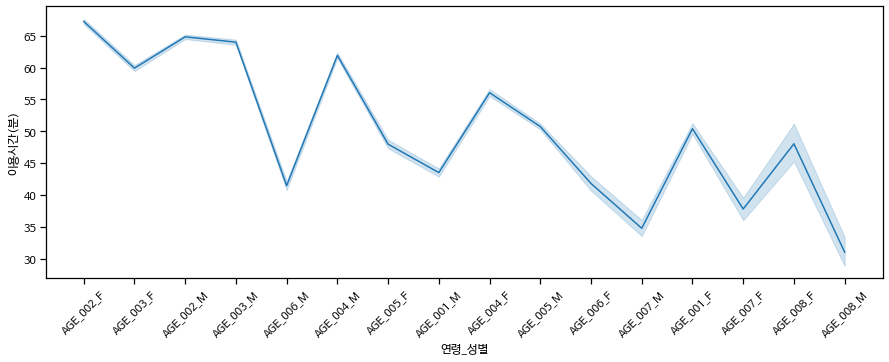

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(public_bicycle_2020['연령_성별'], public_bicycle_2020['이용시간(분)'])
plt.xticks(rotation = 45);

In [ ]:
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),연령_성별
0,20200101,102,1,1,20,1,9.90,500.00,5,AGE_002_F
1,20200101,102,1,1,30,2,103.91,5050.00,38,AGE_003_F
2,20200101,104,3,0,20,1,145.05,6660.00,57,AGE_002_M
3,20200101,107,1,1,20,1,141.61,5960.00,37,AGE_002_F
4,20200101,109,2,0,20,2,138.33,4990.00,29,AGE_002_M
...,...,...,...,...,...,...,...,...,...,...
447982,20201231,3586,1,1,40,1,30.89,1200.00,10,AGE_004_F
447983,20201231,3586,1,0,20,4,67.42,2619.20,60,AGE_002_M
447984,20201231,3587,1,0,20,3,24.35,940.18,15,AGE_002_M
447985,20201231,3587,1,0,30,2,74.75,2550.79,66,AGE_003_M


In [ ]:
public_bicycle_2020['이용시간(분)'].describe()

count    447987.000000
mean         59.554592
std          50.656568
min           0.000000
25%          19.000000
50%          45.000000
75%          87.000000
max         224.000000
Name: 이용시간(분), dtype: float64

In [ ]:
list = []
for i in public_bicycle_2020['이용시간(분)'] :
  if i >= 59.556592 :
    list.append(1)
  elif i < 59.556592 :
    list.append(0)

list

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [ ]:
public_bicycle_2020['more_top5avr_min'] = list
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),연령_성별,more_top5avr_min
0,20200101,102,1,1,20,1,9.90,500.00,5,AGE_002_F,0
1,20200101,102,1,1,30,2,103.91,5050.00,38,AGE_003_F,0
2,20200101,104,3,0,20,1,145.05,6660.00,57,AGE_002_M,0
3,20200101,107,1,1,20,1,141.61,5960.00,37,AGE_002_F,0
4,20200101,109,2,0,20,2,138.33,4990.00,29,AGE_002_M,0
...,...,...,...,...,...,...,...,...,...,...,...
447982,20201231,3586,1,1,40,1,30.89,1200.00,10,AGE_004_F,0
447983,20201231,3586,1,0,20,4,67.42,2619.20,60,AGE_002_M,1
447984,20201231,3587,1,0,20,3,24.35,940.18,15,AGE_002_M,0
447985,20201231,3587,1,0,30,2,74.75,2550.79,66,AGE_003_M,1


In [ ]:
public_bicycle_2020 = public_bicycle_2020.drop(columns='이용시간(분)', axis = 1)
public_bicycle_2020

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),연령_성별,more_top5avr_min
0,20200101,102,1,1,20,1,9.90,500.00,AGE_002_F,0
1,20200101,102,1,1,30,2,103.91,5050.00,AGE_003_F,0
2,20200101,104,3,0,20,1,145.05,6660.00,AGE_002_M,0
3,20200101,107,1,1,20,1,141.61,5960.00,AGE_002_F,0
4,20200101,109,2,0,20,2,138.33,4990.00,AGE_002_M,0
...,...,...,...,...,...,...,...,...,...,...
447982,20201231,3586,1,1,40,1,30.89,1200.00,AGE_004_F,0
447983,20201231,3586,1,0,20,4,67.42,2619.20,AGE_002_M,1
447984,20201231,3587,1,0,20,3,24.35,940.18,AGE_002_M,0
447985,20201231,3587,1,0,30,2,74.75,2550.79,AGE_003_M,1


In [ ]:
public_bicycle_2020.corr()

,대여일자,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),more_top5avr_min
대여일자,1.000000,0.063737,-0.019056,-0.017947,-0.040874,0.142695,-0.002307,-0.156860,0.088289
대여소번호,0.063737,1.000000,0.005089,-0.000372,-0.029000,-0.068912,-0.001254,-0.005571,-0.043250
대여구분코드,-0.019056,0.005089,1.000000,0.070947,-0.214777,-0.229395,-0.000245,0.142147,0.015056
성별,-0.017947,-0.000372,0.070947,1.000000,-0.088642,-0.100817,-0.001686,0.022733,0.001077
연령대코드,-0.040874,-0.029000,-0.214777,-0.088642,1.000000,-0.170298,0.002193,-0.003191,-0.074188
이용건수,0.142695,-0.068912,-0.229395,-0.100817,-0.170298,1.000000,0.001954,0.099726,0.539215
운동량,-0.002307,-0.001254,-0.000245,-0.001686,0.002193,0.001954,1.000000,0.008047,0.003965
이동거리(M),-0.156860,-0.005571,0.142147,0.022733,-0.003191,0.099726,0.008047,1.000000,0.423079
more_top5avr_min,0.088289,-0.043250,0.015056,0.001077,-0.074188,0.539215,0.003965,0.423079,1.000000


In [ ]:
public_bicycle_2020_1 = public_bicycle_2020

In [ ]:
public_bicycle_2020 = public_bicycle_2020.drop('연령_성별', axis = 1)

In [ ]:
public_bicycle_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447987 entries, 0 to 447986
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   대여일자              447987 non-null  int64  
 1   대여소번호             447987 non-null  int64  
 2   대여구분코드            447987 non-null  int64  
 3   성별                447987 non-null  int64  
 4   연령대코드             447987 non-null  int64  
 5   이용건수              447987 non-null  int64  
 6   운동량               447987 non-null  float64
 7   이동거리(M)           447987 non-null  float64
 8   more_top5avr_min  447987 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 30.8 MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = 'more_top5avr_min'

In [ ]:
features = public_bicycle_2020.columns.drop('more_top5avr_min')

In [ ]:
train, test = train_test_split(public_bicycle_2020, test_size=0.2, random_state=2)

In [ ]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [ ]:
train[target].value_counts(normalize=True)

0    0.612072
1    0.387928
Name: more_top5avr_min, dtype: float64

In [102]:
!pip install catboost

     |████████████████████████████████| 69.2MB 60kB/s 


In [118]:
!pip install pdpbox

     |████████████████████████████████| 34.0MB 87kB/s 
     |████████████████████████████████| 13.1MB 239kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758227 sha256=568116f9026ebd0376f479617af3524d80c8cddc42b31a8e3456a80ae3637b6b
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [119]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import cross_val_score
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool
from pdpbox.pdp import pdp_isolate, pdp_plot

#모델링

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    XGBClassifier(n_estimators = 10))

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_train, y_train))

y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('f1_score: ', f1)

검증 정확도:  0.8183677512423652
f1_score:  0.7533475349969567


In [ ]:
xgb = XGBClassifier(random_state =42)

xgb_param = {
    'subsample': [0.6, 0.7, 1.0], #샘플링하는 비율
    'max_depth': [2, 5, 10],
    'learning_rate': [0.05, 0.01] #학습률 (디폴트는 0.3)
}

grid_xgb = GridSearchCV(xgb, param_grid=xgb_param, scoring='f1', cv=5)
grid_xgb.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.01], 'max_depth': [2, 5, 10],
                         'subsample': [0.6, 0.7, 1.0]},
             pre_dispatch='2*n_jobs', r

In [95]:
grid_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'subsample': 0.7}

In [96]:
xgb_pred = grid_xgb.best_estimator_.predict(X_test)
f1_xgb = f1_score(y_test, xgb_pred)
print('f1_score: ', f1_xgb)

f1_score:  0.7814638655712773


In [110]:
pipe = make_pipeline( 
    CatBoostClassifier(random_seed=100))

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_train, y_train))

y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('f1_score: ', f1)

Learning rate set to 0.126953
0:	learn: 0.6071149	total: 88ms	remaining: 1m 27s
1:	learn: 0.5440450	total: 177ms	remaining: 1m 28s
2:	learn: 0.5014151	total: 270ms	remaining: 1m 29s
3:	learn: 0.4741275	total: 355ms	remaining: 1m 28s
4:	learn: 0.4512258	total: 441ms	remaining: 1m 27s
5:	learn: 0.4337469	total: 537ms	remaining: 1m 28s
6:	learn: 0.4221489	total: 632ms	remaining: 1m 29s
7:	learn: 0.4116442	total: 728ms	remaining: 1m 30s
8:	learn: 0.4041740	total: 823ms	remaining: 1m 30s
9:	learn: 0.3980321	total: 921ms	remaining: 1m 31s
10:	learn: 0.3934270	total: 1.01s	remaining: 1m 31s
11:	learn: 0.3897244	total: 1.12s	remaining: 1m 32s
12:	learn: 0.3869504	total: 1.21s	remaining: 1m 31s
13:	learn: 0.3841031	total: 1.3s	remaining: 1m 31s
14:	learn: 0.3819719	total: 1.4s	remaining: 1m 31s
15:	learn: 0.3800979	total: 1.49s	remaining: 1m 31s
16:	learn: 0.3783337	total: 1.58s	remaining: 1m 31s
17:	learn: 0.3769781	total: 1.68s	remaining: 1m 31s
18:	learn: 0.3758913	total: 1.77s	remaining: 1m

In [114]:
cb = CatBoostClassifier(random_seed=10)

cb_param = {
        'depth': [2, 5],
    'learning_rate': [0.05, 0.1] #학습률 (디폴트는 0.3)
}

grid_cb = GridSearchCV(cb, param_grid=cb_param, scoring='f1', cv=5)
grid_cb.fit(X_train, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0:	learn: 0.6275602	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.5758790	total: 145ms	remaining: 1m 12s
2:	learn: 0.5359362	total: 214ms	remaining: 1m 11s
3:	learn: 0.5083609	total: 292ms	remaining: 1m 12s
4:	learn: 0.4866211	total: 365ms	remaining: 1m 12s
5:	learn: 0.4667159	total: 432ms	remaining: 1m 11s
6:	learn: 0.4503385	total: 514ms	remaining: 1m 12s
7:	learn: 0.4376689	total: 585ms	remaining: 1m 12s
8:	learn: 0.4281686	total: 656ms	remaining: 1m 12s
9:	learn: 0.4203568	total: 736ms	remaining: 1m 12s
10:	learn: 0.4135869	total: 802ms	remaining: 1m 12s
11:	learn: 0.4080477	total: 865ms	remaining: 1m 11s
12:	learn: 0.4031228	total: 933ms	remaining: 1m 10s
13:	learn: 0.3993318	total: 1.01s	remaining: 1m 11s
14:	learn: 0.3965617	total: 1.08s	remaining: 1m 11s
15:	learn: 0.3936186	total: 1.16s	remaining: 1m 11s
16:	learn: 0.3914915	total: 1.23s	remaining: 1m 11s
17:	learn: 0.3890854	total: 1.31s	remaining: 1m 11s
18:	learn: 0.3876764	total: 1.38s	rema

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7efee592d810>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [2, 5], 'learning_rate': [0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [115]:
grid_cb.best_params_

{'depth': 5, 'learning_rate': 0.05}

In [116]:
cb_pred = grid_cb.best_estimator_.predict(X_test)
f1_cb = f1_score(y_test, xgb_pred)
print('f1_score: ', f1_cb)

f1_score:  0.7814638655712773


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


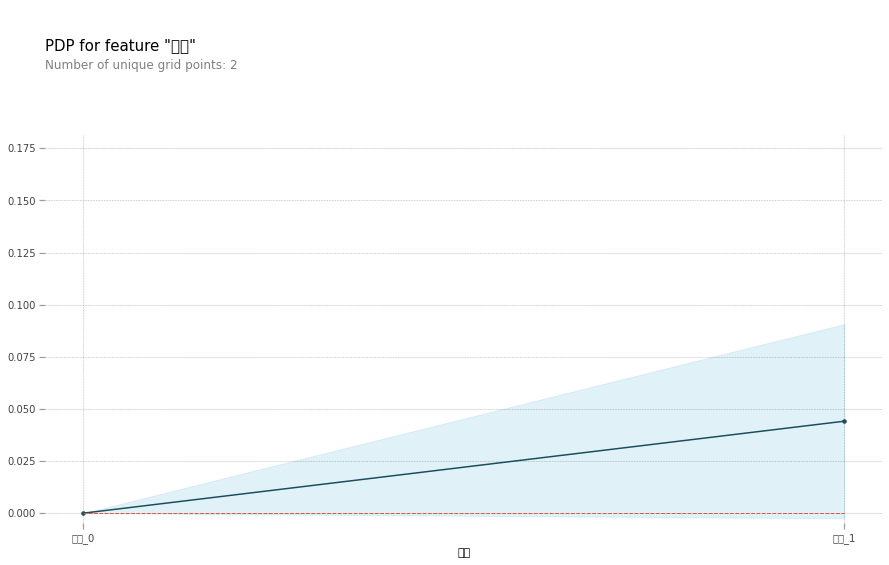

In [131]:
from pdpbox import pdp

rf = pipe.named_steps['catboostclassifier']

feature = '성별'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

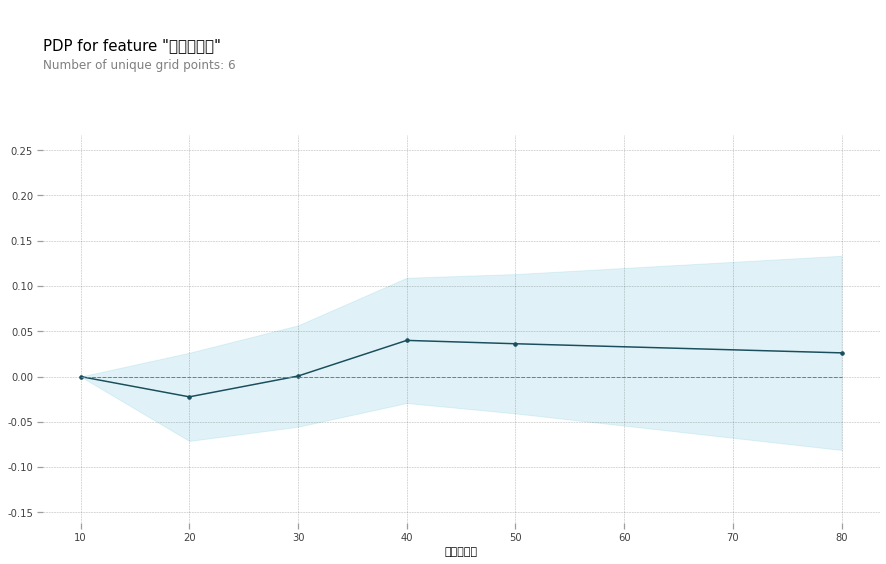

In [133]:
from pdpbox import pdp

rf = pipe.named_steps['catboostclassifier']

feature = '연령대코드'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

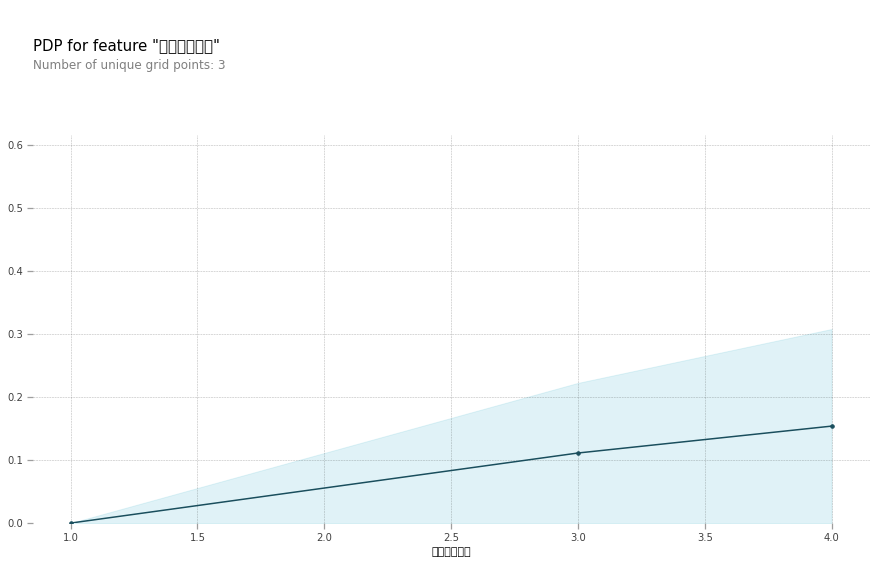

In [135]:
from pdpbox import pdp

rf = pipe.named_steps['catboostclassifier']

feature = '대여구분코드'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

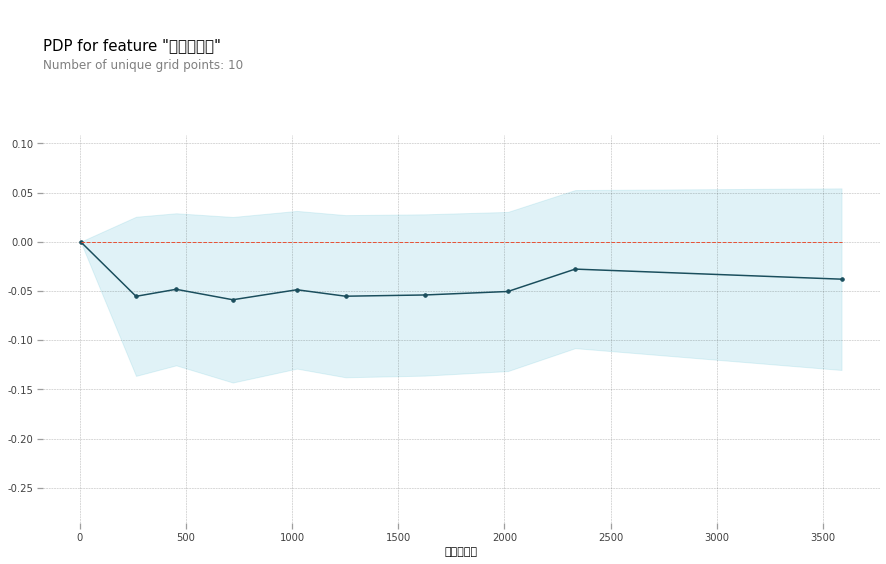

In [137]:
from pdpbox import pdp

rf = pipe.named_steps['catboostclassifier']

feature = '대여소번호'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 